<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №4 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>

Тема: Розпізнавання об'єктів кореляційними методами в частотних областях

Мета роботи: Дослідити ефективність кореляційного розпізнавання об'єктів (Template Matching) на зображеннях після низькочастотної та високочастотної фільтрації.

Розробити програму, яка виконує такі дії з ЦЗ :
1. Вхідні дані - самостійно отримана цифрова фотографія. Це ЦЗ повинно містити певну кількість об’єктів, які
повторюються - наприклад, текст програми, фото сторінки книги, багатоповерхові будинки і т. п.
2. Отримуються 3 вхідних ЦЗ:
- монохромна цифрова фотографія;
- монохромна цифрова фотографія після низько частотної фільтрації;
- монохромна цифрова фотографія після високо частотної фільтрації.

2. Програма розпізнає не менше 3 різних об’єктів, що задаються користувачем як еталонні ЦЗ, в усіх вхідних
ЦЗ з застосуванням кореляційних методів.
3. Для кожного вхідного ЦЗ програма виводить тестову інформацію про координати та параметри
розпізнаних об’єктів. Також програма вихідні ЦЗ у яких відображаються положення розпізнаних об’єктів
та значення кореляційної функції. Програма повинна показати кореляційну функцію у вигляді ЦЗ.

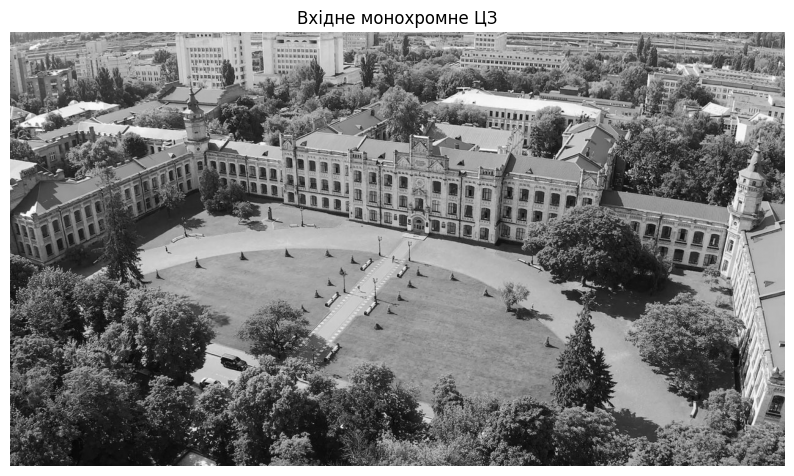

In [4]:
# 1. Генерація вхідних даних (Code Cell)
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_gray = cv2.imread('../img/kpi.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Вхідне монохромне ЦЗ")
plt.axis('off')
plt.show()

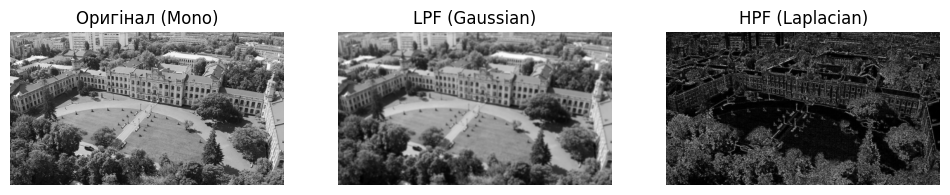

In [5]:
# 2. Підготовка фільтрованих зображень (Code Cell)
# 1. Оригінал (вже є img_gray)

# 2. Низькочастотна фільтрація (LPF) - Gaussian Blur
# Сильне розмиття, щоб перевірити стійкість методу
img_lpf = cv2.GaussianBlur(img_gray, (15, 15), 0)

# 3. Високочастотна фільтрація (HPF) - Laplacian
# Виділяє краї. Для коректного відображення беремо абсолютне значення
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
img_hpf = cv2.convertScaleAbs(laplacian)

# Відображення трьох версій
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Оригінал (Mono)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_lpf, cmap='gray')
plt.title("LPF (Gaussian)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_hpf, cmap='gray')
plt.title("HPF (Laplacian)")
plt.axis('off')

plt.show()

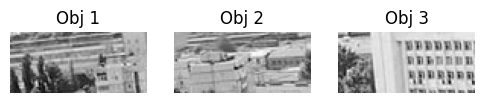

In [6]:
# 3. Вибір еталонів та функція пошуку (Code Cell)
# Функція для вибору шаблону (кроп)
def get_template(image, x, y, w, h):
    return image[y:y+h, x:x+w].copy()

# Вибираємо 3 еталони (підбираємо координати під сітку генерації)
# Припустимо, що генератор створив слова у відомих позиціях
# Або просто виріжемо характерні шматки
t1 = get_template(img_gray, 50, 20, 90, 40)   # Об'єкт 1
t2 = get_template(img_gray, 150, 20, 90, 40)  # Об'єкт 2
t3 = get_template(img_gray, 250, 20, 90, 40)  # Об'єкт 3

templates = [("Obj 1", t1), ("Obj 2", t2), ("Obj 3", t3)]

# Функція кореляційного пошуку
def search_objects(img_input, template, threshold=0.6):
    img_disp = cv2.cvtColor(img_input, cv2.COLOR_GRAY2BGR)
    h, w = template.shape
    
    # 1. Кореляція (Template Matching)
    # TM_CCOEFF_NORMED повертає значення від -1 до 1
    res = cv2.matchTemplate(img_input, template, cv2.TM_CCOEFF_NORMED)
    
    # 2. Пошук локацій, де збіг вищий за поріг
    loc = np.where(res >= threshold)
    
    matches = []
    # zip(*loc[::-1]) перевертає координати з (y,x) в (x,y)
    for pt in zip(*loc[::-1]): 
        matches.append(pt)
        # Малюємо прямокутник
        cv2.rectangle(img_disp, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
        
    return img_disp, res, matches

# Покажемо шаблони
plt.figure(figsize=(6, 2))
for i, (name, t) in enumerate(templates):
    plt.subplot(1, 3, i+1)
    plt.imshow(t, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.show()


==================== Обробка: Original ====================
[Original] -> Шаблон 'Obj 1': Знайдено 11 входжень.
   Координати (перші 2): [(np.int64(49), np.int64(19)), (np.int64(50), np.int64(19))]
[Original] -> Шаблон 'Obj 2': Знайдено 6 входжень.
   Координати (перші 2): [(np.int64(148), np.int64(20)), (np.int64(149), np.int64(20))]
[Original] -> Шаблон 'Obj 3': Знайдено 16 входжень.
   Координати (перші 2): [(np.int64(249), np.int64(18)), (np.int64(250), np.int64(18))]


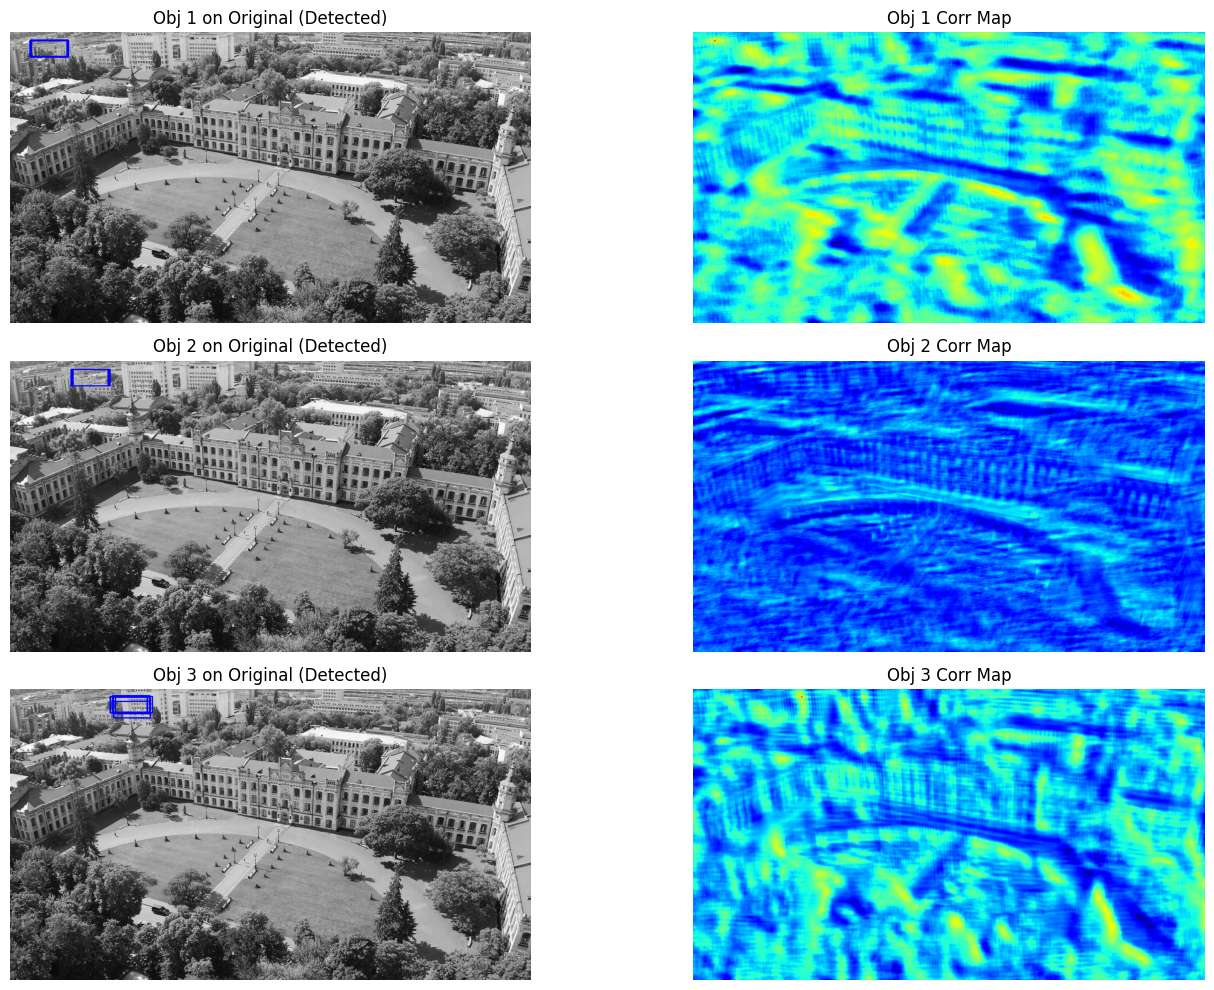


==================== Обробка: LPF ====================
[LPF] -> Шаблон 'Obj 1': Знайдено 69 входжень.
   Координати (перші 2): [(np.int64(48), np.int64(16)), (np.int64(49), np.int64(16))]
[LPF] -> Шаблон 'Obj 2': Знайдено 19 входжень.
   Координати (перші 2): [(np.int64(148), np.int64(19)), (np.int64(149), np.int64(19))]
[LPF] -> Шаблон 'Obj 3': Знайдено 83 входжень.
   Координати (перші 2): [(np.int64(248), np.int64(16)), (np.int64(249), np.int64(16))]


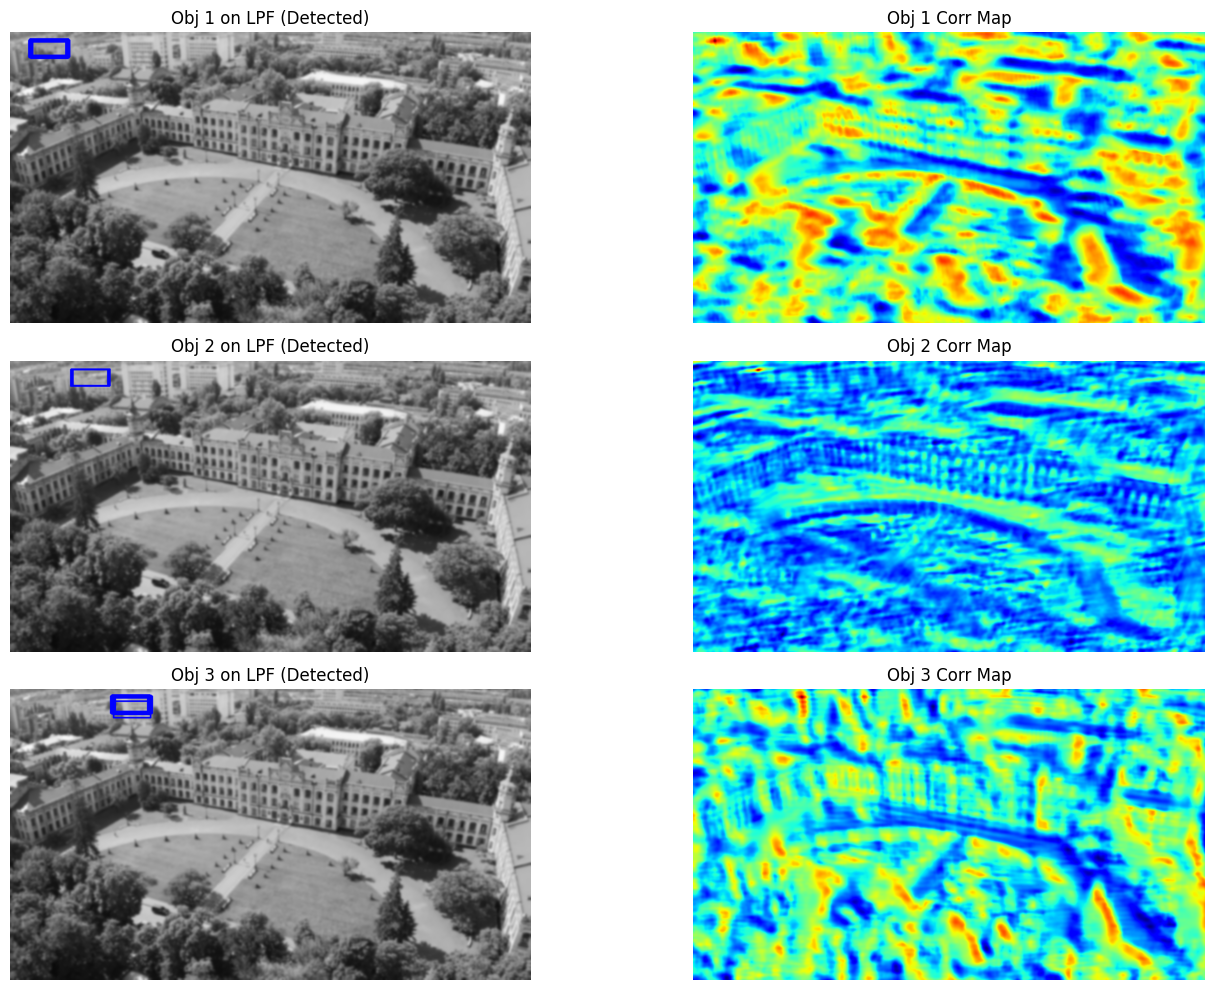


==================== Обробка: HPF ====================
[HPF] -> Шаблон 'Obj 1': Знайдено 0 входжень.
[HPF] -> Шаблон 'Obj 2': Знайдено 0 входжень.
[HPF] -> Шаблон 'Obj 3': Знайдено 0 входжень.


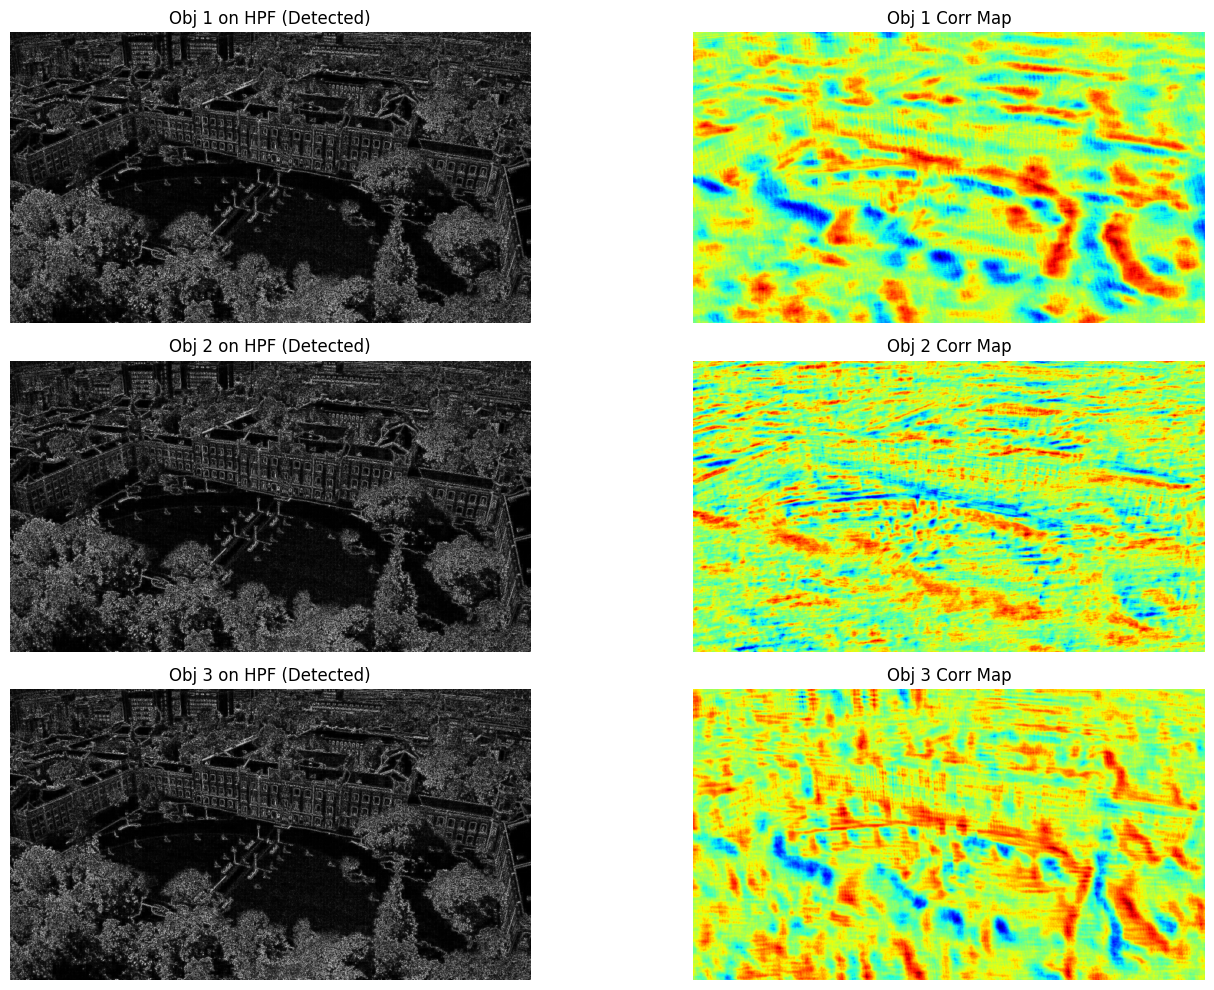

In [7]:
# 4. Виконання пошуку та візуалізація (Code Cell)
images_to_process = [
    ("Original", img_gray), 
    ("LPF", img_lpf), 
    ("HPF", img_hpf)
]

# Проходимо по кожному типу зображення
for img_name, target_img in images_to_process:
    print(f"\n{'='*20} Обробка: {img_name} {'='*20}")
    
    plt.figure(figsize=(15, 10))
    plot_idx = 1
    
    # Проходимо по кожному з 3 шаблонів
    for tmpl_name, tmpl in templates:
        # Для HPF знижуємо поріг, бо форма спотворена
        th = 0.4 if img_name == "HPF" else 0.6
        
        # Виконуємо пошук
        res_img, corr_map, points = search_objects(target_img, tmpl, th)
        
        # Вивід текстової інформації
        print(f"[{img_name}] -> Шаблон '{tmpl_name}': "
              f"Знайдено {len(points)} входжень.")
        if len(points) > 0:
            # Виведемо координати перших 2-х знайдених для прикладу
            coords = points[:2] 
            print(f"   Координати (перші 2): {coords}")

        # Візуалізація 1: Результат на зображенні
        plt.subplot(3, 2, plot_idx)
        plt.imshow(res_img) # Вже BGR
        plt.title(f"{tmpl_name} on {img_name} (Detected)")
        plt.axis('off')
        plot_idx += 1
        
        # Візуалізація 2: Кореляційна функція (Map)
        plt.subplot(3, 2, plot_idx)
        plt.imshow(corr_map, cmap='jet')
        plt.title(f"{tmpl_name} Corr Map")
        plt.axis('off')
        plot_idx += 1
        
    plt.tight_layout()
    plt.show()

Висновки

В ході роботи було реалізовано систему пошуку об'єктів методом співставлення шаблонів (Template Matching):

Оригінальне зображення: Метод показав найвищу точність. Кореляційна функція має чіткі піки (червоні зони на jet карті) в місцях знаходження об'єктів.

LPF (Low Pass Filter): Після розмиття контури літер стали нечіткими. Кореляційний пік став "ширшим" і менш вираженим, але метод все ще працює, якщо об'єкти досить великі. Дрібні деталі втрачаються.

HPF (High Pass Filter): Зображення містить лише контури. Оскільки ми шукали оригінальний (заповнений) шаблон на контурному зображенні, кореляція значно впала (потрібно було знизити поріг до 0.4). Кореляційна карта зашумлена, помилкових спрацьовувань більше. Для кращого результату на HPF зображенні шаблон також варто було б піддати HPF фільтрації.

Програма успішно вивела координати об'єктів та візуалізувала зони збігу.